In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [43]:
train_data = '/content/drive/MyDrive/Baitap_AI/trai_cay/train'
test_data =  '/content/drive/MyDrive/Baitap_AI/trai_cay/test'
val_data  =  '/content/drive/MyDrive/Baitap_AI/trai_cay/test'

In [44]:
from keras.engine.data_adapter import train_validation_split

In [45]:
data_scale = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,target_size=(120, 120),batch_size=32,class_mode="categorical")

Found 160 images belonging to 10 classes.
Found 86 images belonging to 10 classes.
Found 86 images belonging to 10 classes.


In [46]:
class_name = ['Bưởi', 'Cam', 'Chôm chôm', 'Dâu tây', 'Khế', 'Na', 'Ổi', 'Sầu riêng', 'Vải', 'Xoài']

In [47]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại trái cây: ",train_input.num_classes)

labels:  ['Bưởi', 'Cam', 'Chôm chôm', 'Dâu tây', 'Khế', 'Na', 'Ổi', 'Sầu riêng', 'Vải', 'Xoài']
match class:  {'bưởi': 0, 'cam': 1, 'chôm chôm': 2, 'dâu tây': 3, 'khế': 4, 'na': 5, 'ổi': 6, 'sầu riêng': 7, 'vải': 8, 'xoài': 9}
Tổng cộng các loại trái cây:  10


In [48]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 30, 30, 64)       

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
fruit_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
5/5 [==============================] - 3s 483ms/step - loss: 37.9074 - accuracy: 0.0812 - val_loss: 3.6331 - val_accuracy: 0.1163
Epoch 2/100
5/5 [==============================] - 2s 399ms/step - loss: 7.5397 - accuracy: 0.0938 - val_loss: 2.3098 - val_accuracy: 0.1047
Epoch 3/100
5/5 [==============================] - 2s 411ms/step - loss: 2.4616 - accuracy: 0.1125 - val_loss: 2.2966 - val_accuracy: 0.1512
Epoch 4/100
5/5 [==============================] - 2s 388ms/step - loss: 2.3281 - accuracy: 0.0688 - val_loss: 2.2912 - val_accuracy: 0.1279
Epoch 5/100
5/5 [==============================] - 2s 457ms/step - loss: 2.2799 - accuracy: 0.1375 - val_loss: 2.2981 - val_accuracy: 0.1744
Epoch 6/100
5/5 [==============================] - 2s 441ms/step - loss: 2.2743 - accuracy: 0.0938 - val_loss: 2.3004 - val_accuracy: 0.1163
Epoch 7/100
5/5 [==============================] - 2s 401ms/step - loss: 2.2500 - accuracy: 0.1562 - val_loss: 2.2882 - val_accuracy: 0.1744
Epoch 8/100


In [53]:
model.save('/content/drive/MyDrive/Baitap_AI/trai_cay/fruit.h5')

array([5])

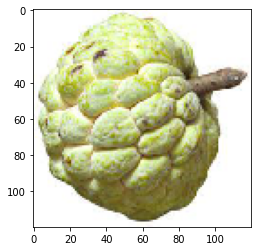

In [54]:
pic = image.load_img('/content/drive/MyDrive/Baitap_AI/trai_cay/na.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [55]:
guess=np.argmax(model.predict(pic), axis=1)

In [56]:
if guess[0]==0:
  print("Loai trai cay: BUOI")
if guess[0]==1:
  print("Loai trai cay: CAM")
if guess[0]==2:
  print("Loai trai cay: CHOM CHOM ")
if guess[0]==3:
  print("Loai trai cay: DAU TAY")
if guess[0]==4:
  print("Loai trai cay: KHE")
if guess[0]==5:
  print("Loai trai cay: NA")
if guess[0]==6:
  print("Loai trai cay: OI")
if guess[0]==7:
  print("Loai trai cay: SAU RIENG")
if guess[0]==8:
  print("Loai trai cay: VAI")
if guess[0]==9:
  print("Loai trai cay: XOAI")

Loai trai cay: NA
